In [1]:
!pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
from sklearn import metrics
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense,Input
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.preprocessing import label_binarize
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow import keras
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import RandomizedSearchCV


In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
### Data type of the Total Charges is object. But it should be converted to float

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

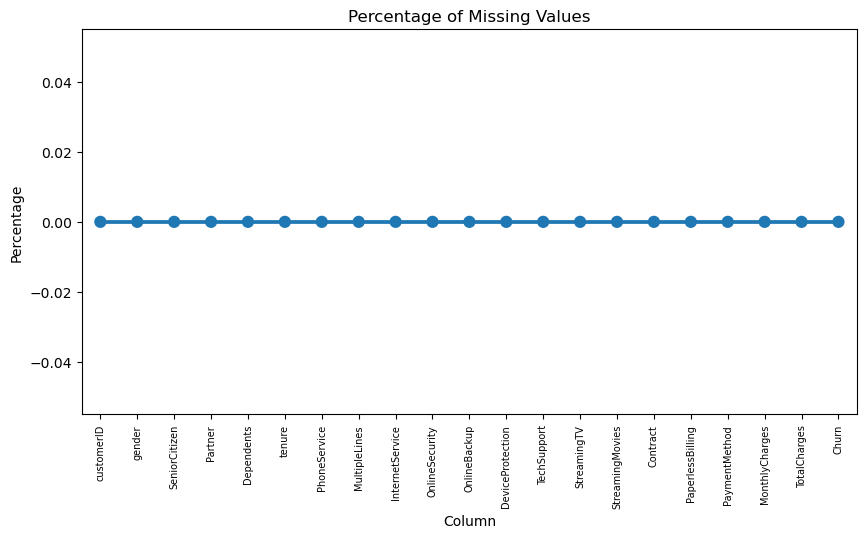

In [11]:
missing = pd.DataFrame((df.isnull().sum() * 100) / df.shape[0]).reset_index()
missing.columns = ['Column', 'Percentage']

# Plotting
plt.figure(figsize=(10,5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Column")
plt.show()

In [12]:
df.duplicated().sum()

0

In [13]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

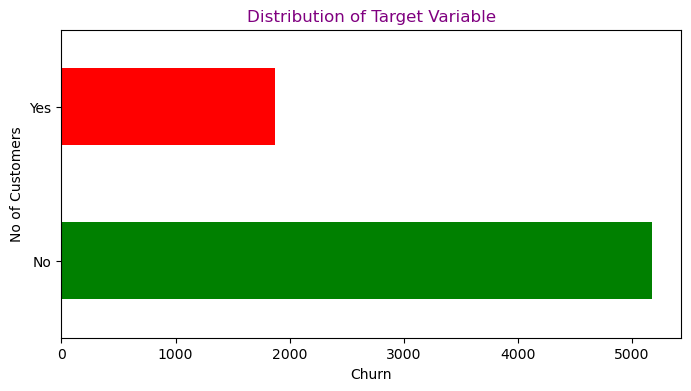

In [14]:
plt.figure(figsize=(8,4))
df['Churn'].value_counts().plot(kind='barh',color=['green','red'])
plt.title('Distribution of Target Variable',color='purple')
plt.xlabel('Churn')
plt.ylabel('No of Customers')
plt.show()

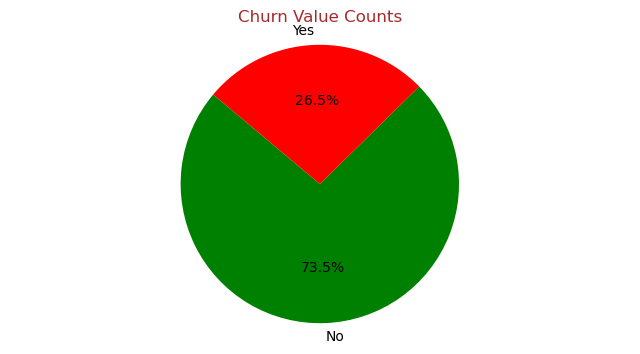

In [15]:
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(8, 4))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Churn Value Counts', color='Brown')
plt.axis('equal')  
plt.show()

In [16]:
### This shows that this is an imbalanced dataset for the model. Since Churners are nearly 27% while non churners are  nearly 73%.

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
#### Senior citizen column is a binary column. Other two columns are numerical columns.

Text(0.5, 1.0, 'Distribution of Customer Tenure(in months) by Churn Status')

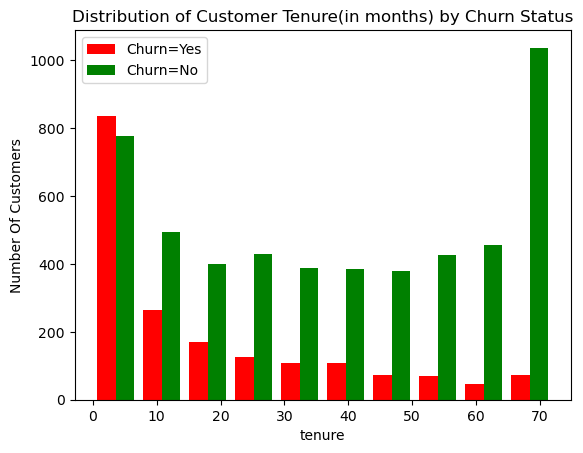

In [19]:
tenure_churn_yes = df[df.Churn=='Yes'].tenure
tenure_churn_no = df[df.Churn=='No'].tenure

plt.figure()
plt.hist([tenure_churn_yes, tenure_churn_no], color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Distribution of Customer Tenure(in months) by Churn Status")

Text(0.5, 1.0, 'Distribution of Monthly Charges by Churn Status')

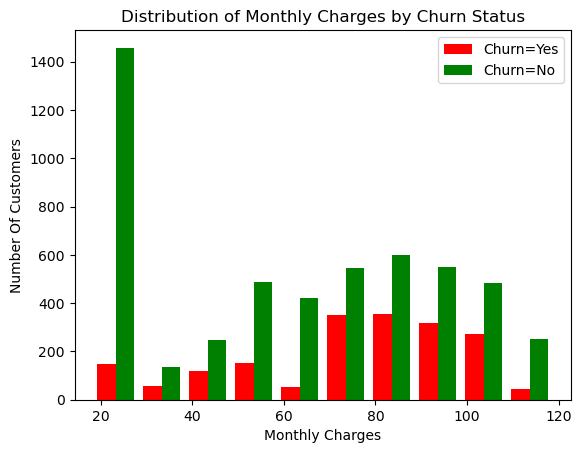

In [20]:
monthc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges
monthc_churn_no = df[df.Churn=='No'].MonthlyCharges 

plt.figure()
plt.hist([monthc_churn_yes, monthc_churn_no], color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Distribution of Monthly Charges by Churn Status")

In [21]:
# Data Cleaning & Data Exploration 

In [22]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [23]:
#### After converting Total Charges to numeric, checking whether there are any missing values

In [24]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

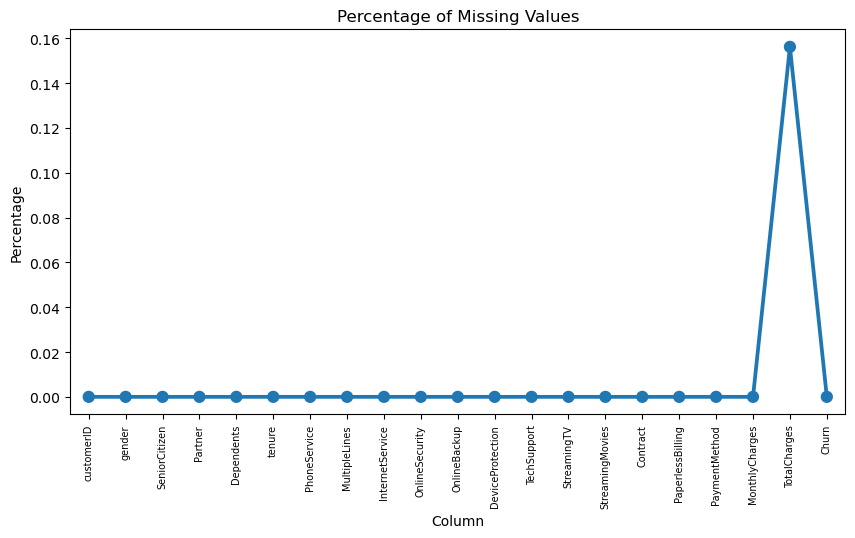

In [25]:
missing = pd.DataFrame((df.isnull().sum() * 100) / df.shape[0]).reset_index()
missing.columns = ['Column', 'Percentage']

# Plotting
plt.figure(figsize=(10,5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.xlabel("Column")
plt.show()

In [26]:
df.loc[df['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [27]:
df.dropna(how = 'any', inplace = True)

In [28]:
df.shape

(7032, 21)

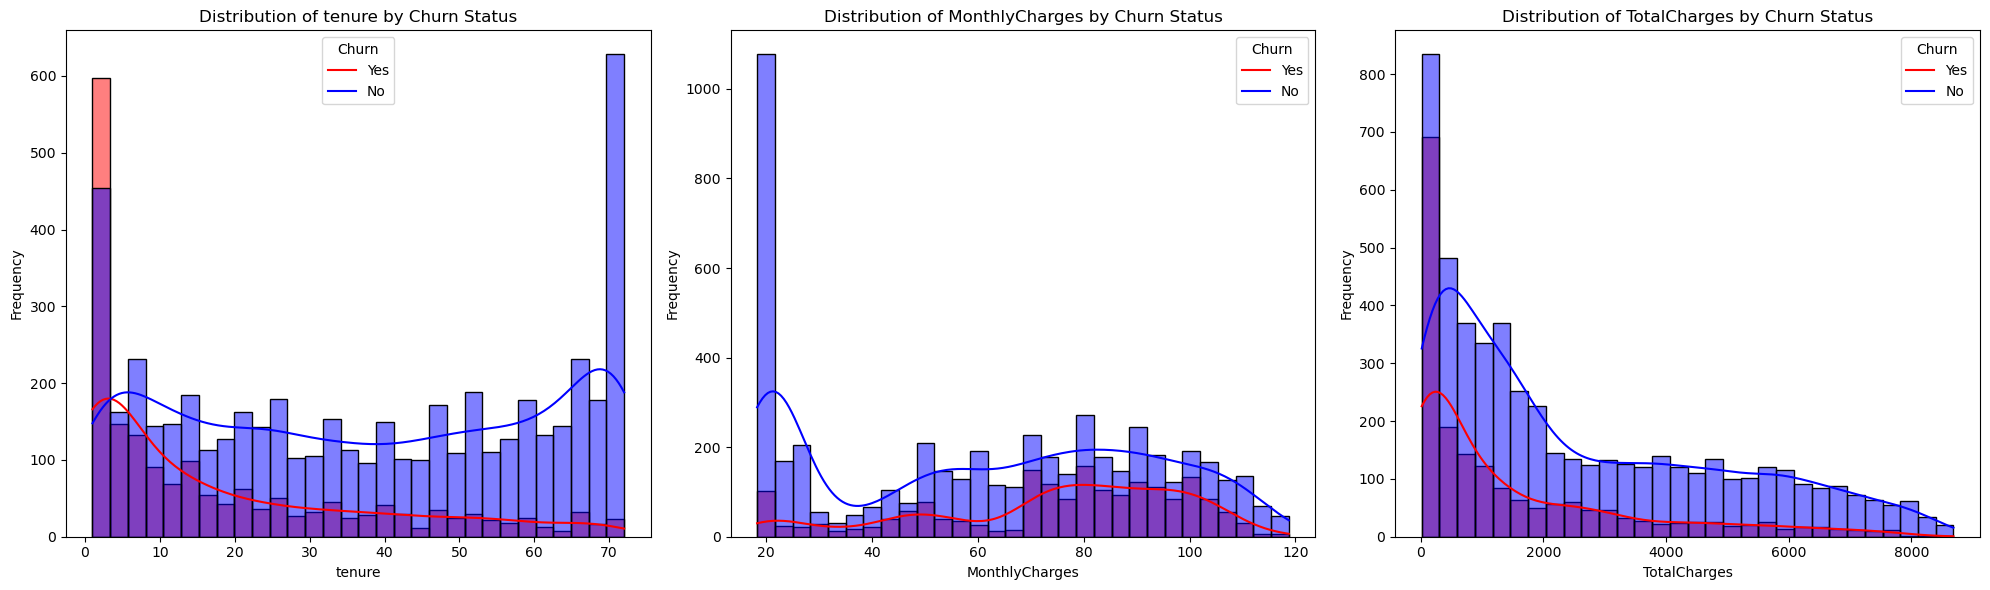

In [29]:
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]


# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, column in enumerate(numerical_features):
    sns.histplot(data=df, x=column, hue="Churn", bins=30, kde=True, alpha=0.5, palette=["blue", "red"], ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Distribution of {column} by Churn Status")
    axes[i].legend(title="Churn", labels=["Yes", "No"])

plt.tight_layout()
plt.show()

In [30]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [31]:
x = ['tenure','MonthlyCharges','TotalCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in tenure
No outliers in MonthlyCharges
No outliers in TotalCharges


In [32]:
#### Grouping the tenure in bins of 12 months e.g.  assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24 likewise

In [33]:
print(df['tenure'].max())

72


In [34]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [35]:
df.loc[df['tenure']==72]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
28,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No,61 - 72
35,6234-RAAPL,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.70,No,61 - 72
59,5954-BDFSG,Female,0,No,No,72,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.70,No,61 - 72
62,0526-SXDJP,Male,0,Yes,No,72,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Bank transfer (automatic),42.10,2962.00,No,61 - 72
94,9848-JQJTX,Male,0,No,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),100.90,7459.05,No,61 - 72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982,8468-FZTOE,Female,0,Yes,Yes,72,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,Yes,Electronic check,74.35,5237.40,No,61 - 72
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No,61 - 72
7022,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.30,No,61 - 72
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,61 - 72


In [36]:
df1= df.drop('customerID',axis=1)

In [37]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1 - 12


<AxesSubplot:>

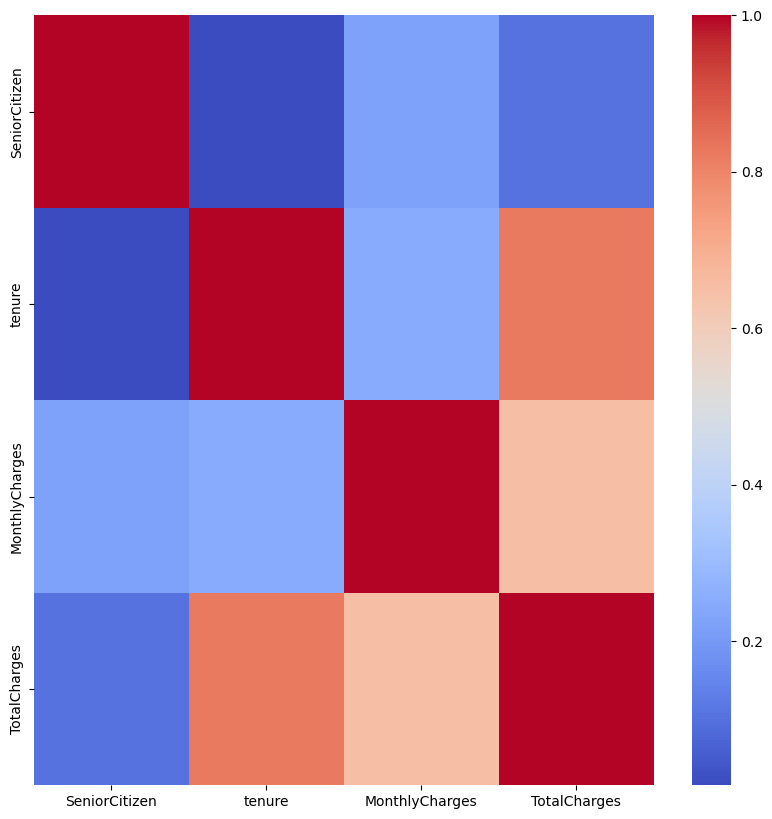

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), cmap="coolwarm")

In [39]:
## Univariate Analysis

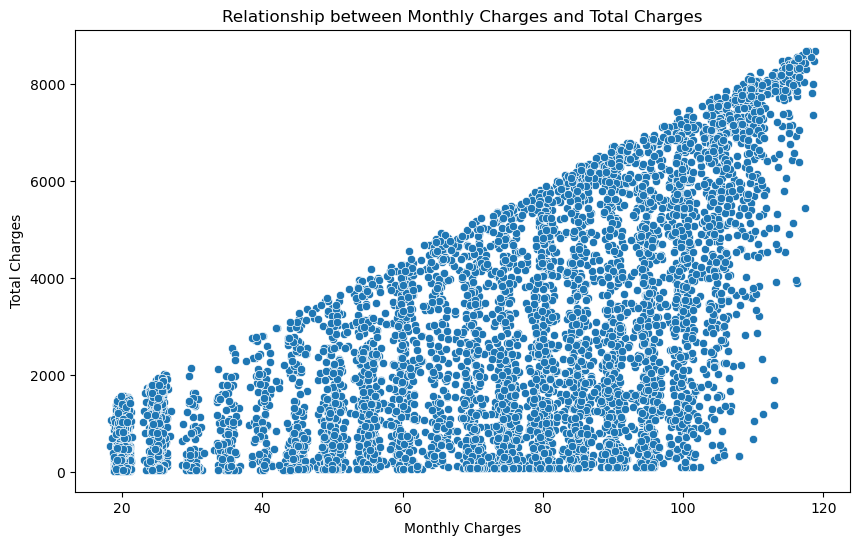

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges')
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.title("Relationship between Monthly Charges and Total Charges")
plt.show()

In [41]:
correlation_coefficient = df1['MonthlyCharges'].corr(df1['TotalCharges'])
print(f'Pearson correlation coefficient between MonthlyCharges and TotalCharges: {correlation_coefficient:.2f}')

Pearson correlation coefficient between MonthlyCharges and TotalCharges: 0.65


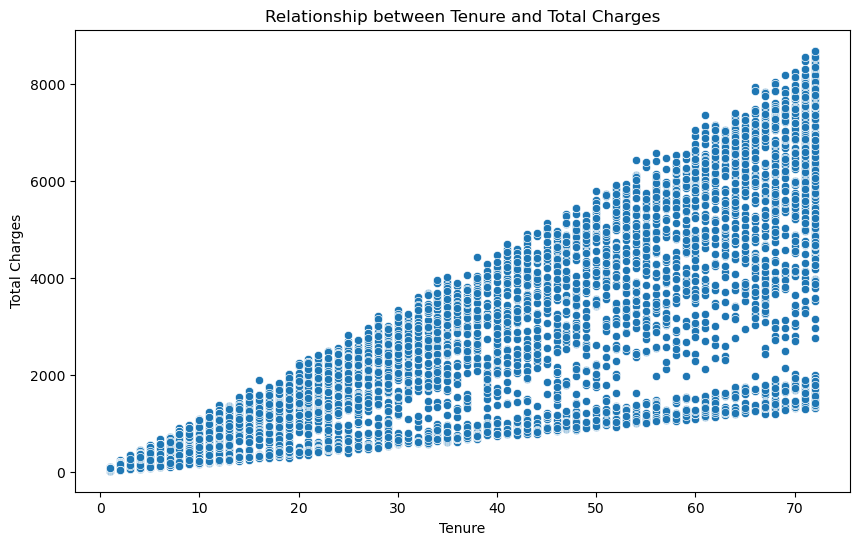

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='TotalCharges')
plt.xlabel("Tenure")
plt.ylabel("Total Charges")
plt.title("Relationship between Tenure and Total Charges")
plt.show()

In [43]:
correlation_coefficient = df['tenure'].corr(df['TotalCharges'])
print(f'Pearson correlation coefficient between Tenure and TotalCharges: {correlation_coefficient:.2f}')

Pearson correlation coefficient between Tenure and TotalCharges: 0.83


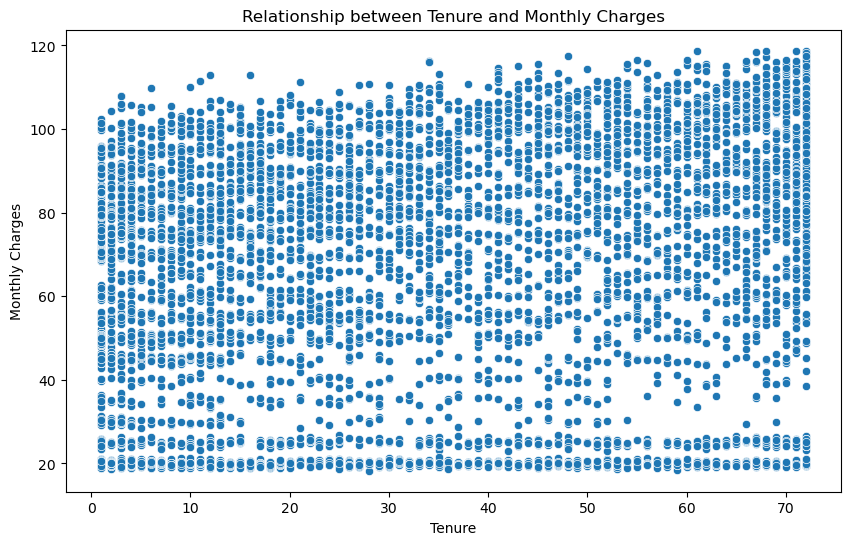

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges')
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.title("Relationship between Tenure and Monthly Charges")
plt.show()

In [45]:
correlation_coefficient = df['tenure'].corr(df['MonthlyCharges'])
print(f'Pearson correlation coefficient between Tenure and MonthlyCharges: {correlation_coefficient:.2f}')

Pearson correlation coefficient between Tenure and MonthlyCharges: 0.25


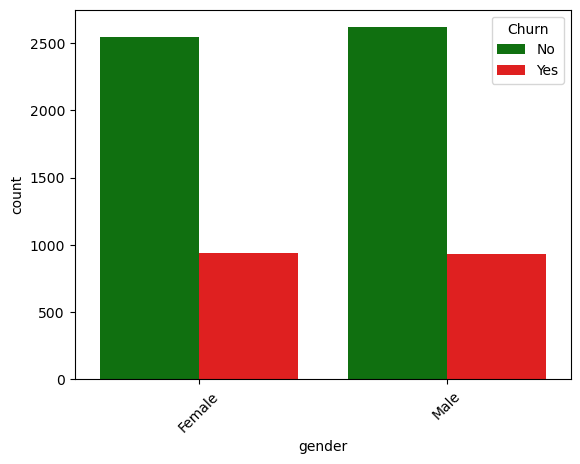

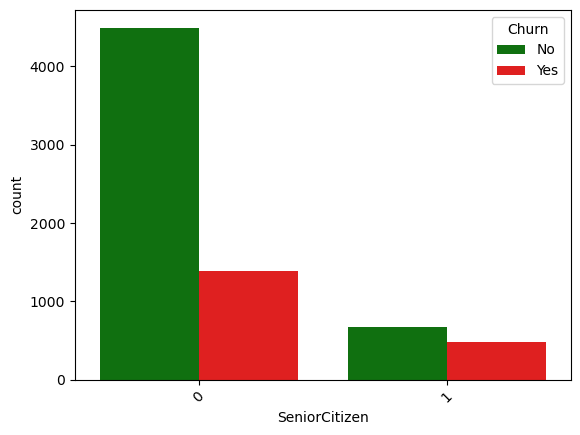

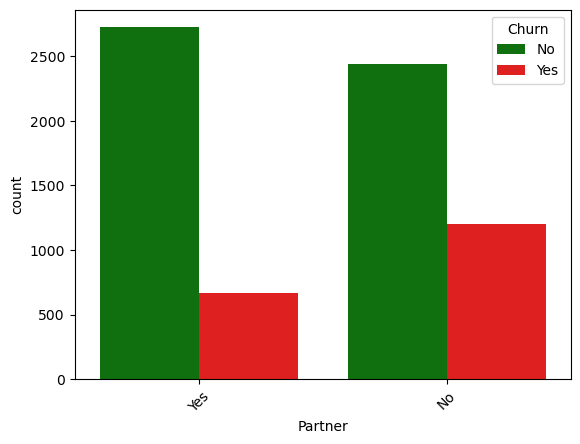

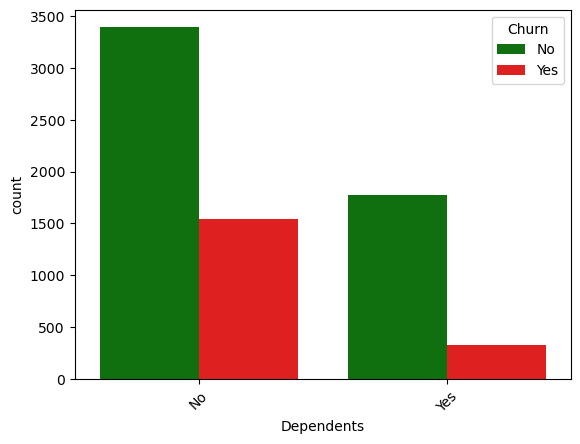

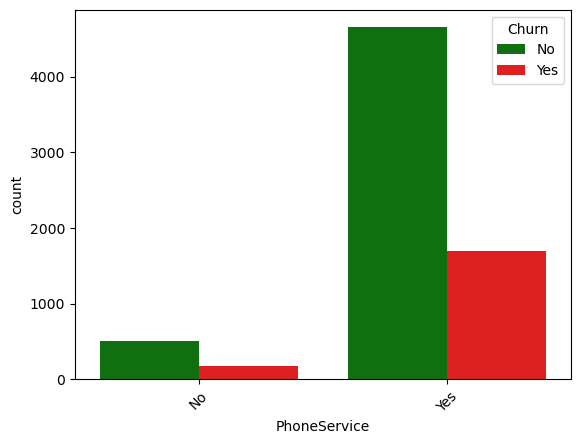

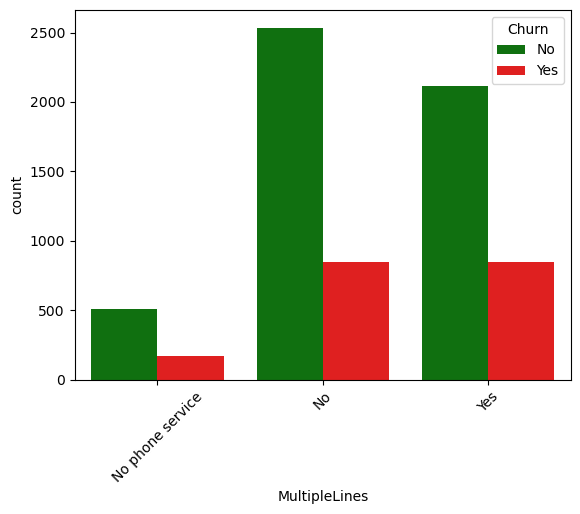

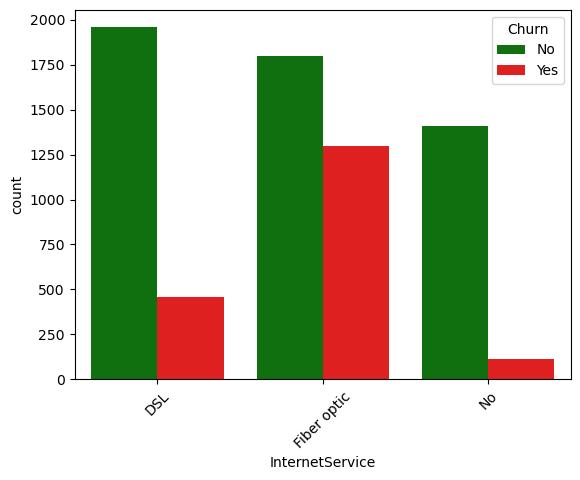

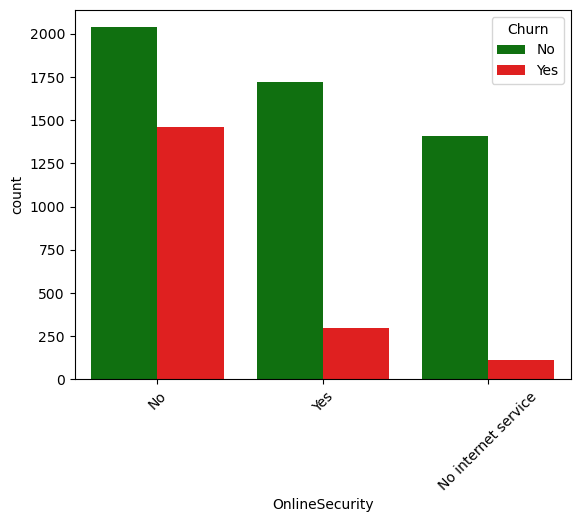

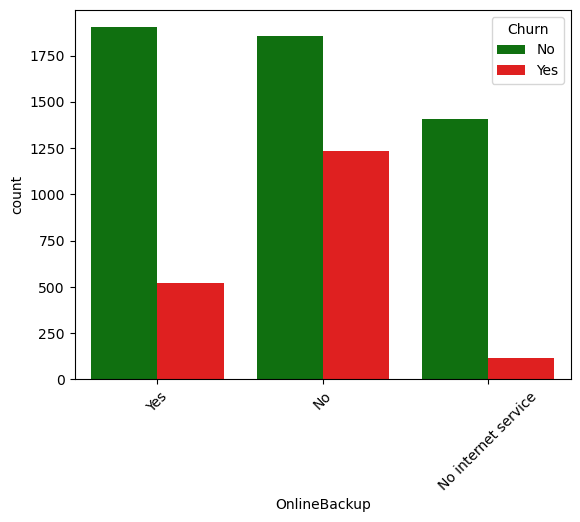

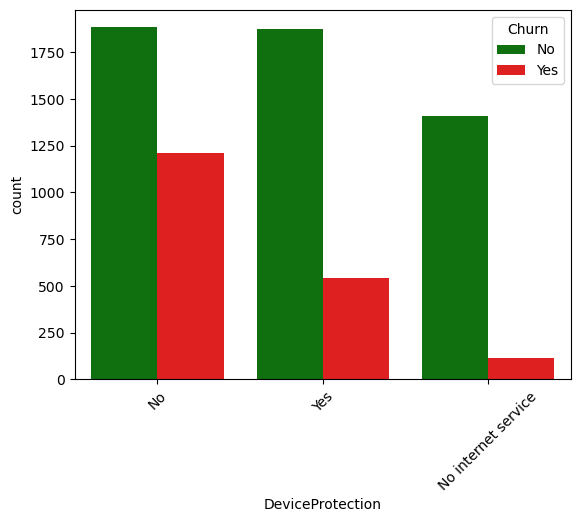

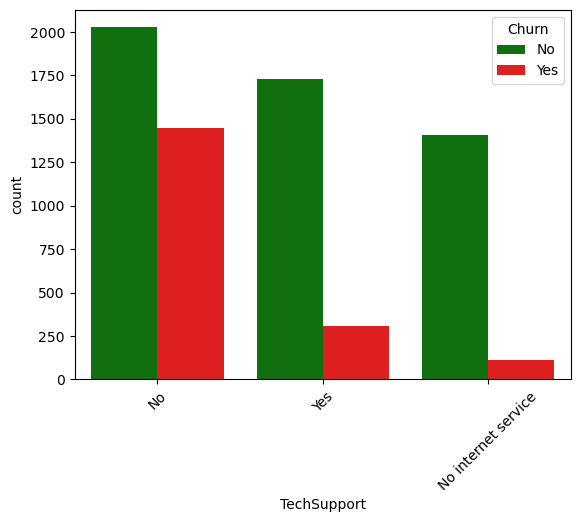

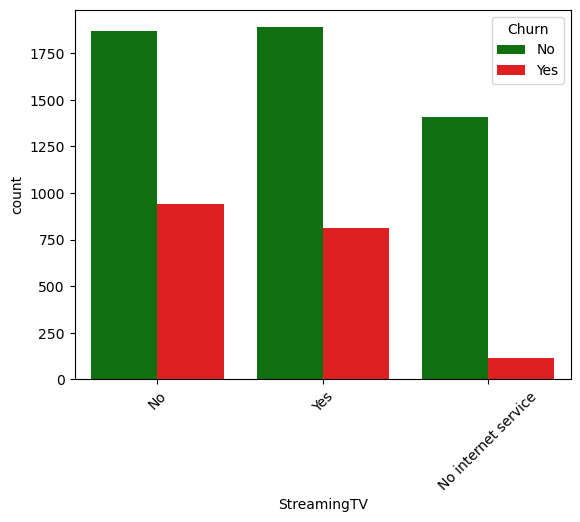

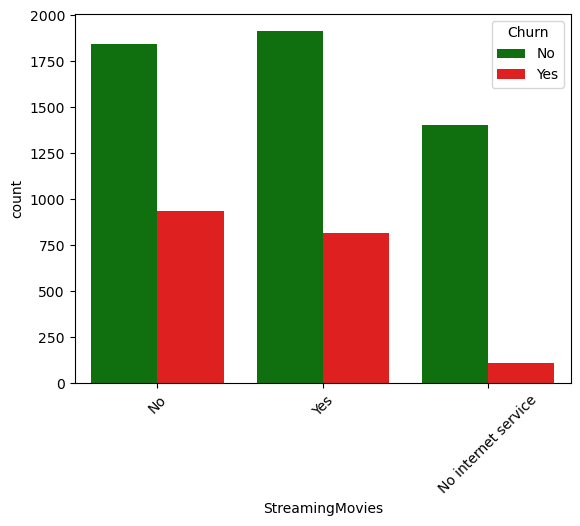

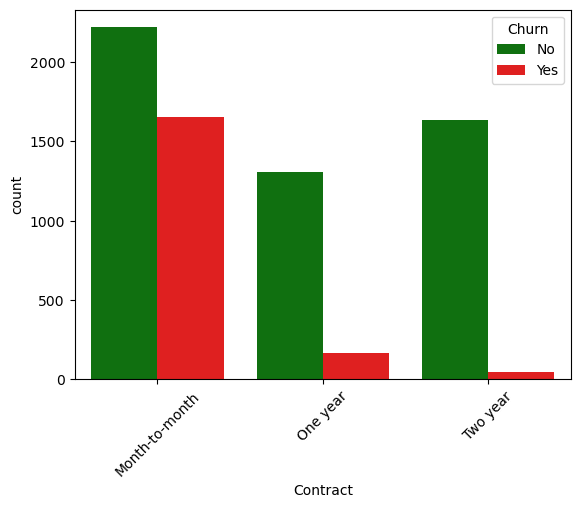

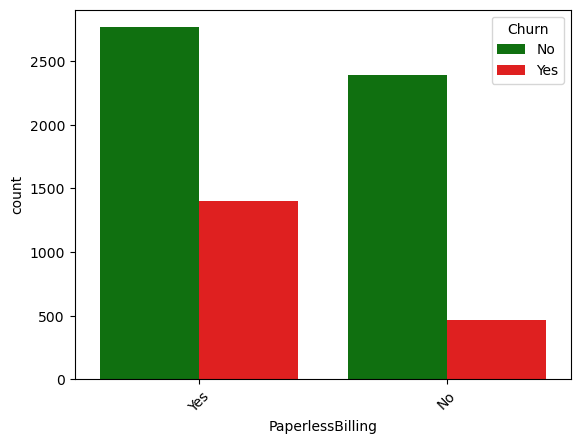

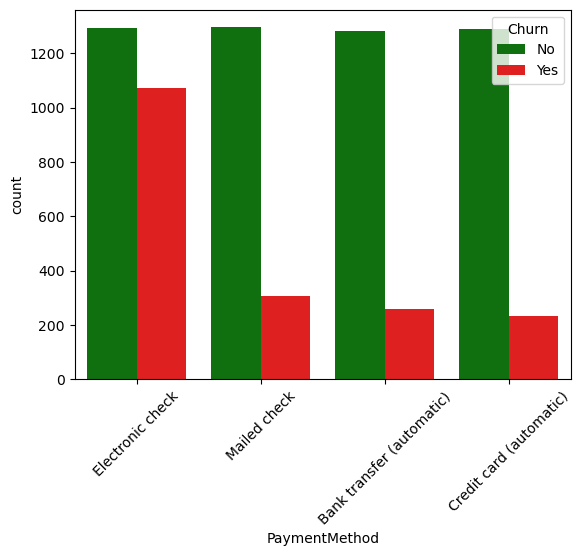

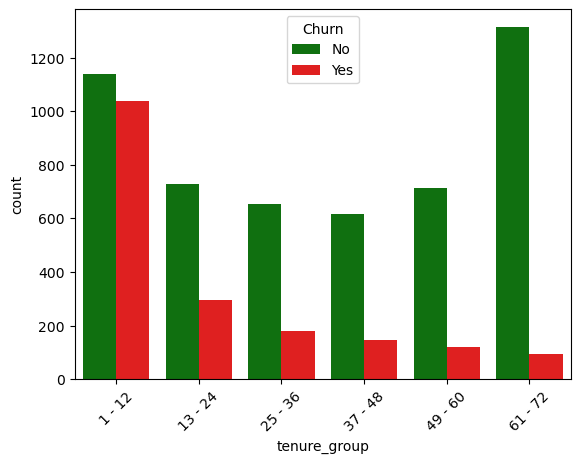

In [46]:
#Categorical Variable Visualization with respect to Churn Status
for i, predictor in enumerate(df1.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges','tenure'])):
    plt.figure(i)
    sns.countplot(data=df1, x=predictor, hue='Churn',palette=["Green", "red"])
    plt.xticks(rotation=45)

In [47]:
#### Insights- Churned count is high  in case of Month to month contracts, No online security, No Tech support, Customers in first year of subscription (1-12 months tenure group), Fibre Optics Internet and payment method is electronic check compared to others.


In [48]:
df1['Churn'] = np.where(df1.Churn == 'Yes',1,0)

In [49]:
df1_dummies = pd.get_dummies(df1)
df1_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


<AxesSubplot:>

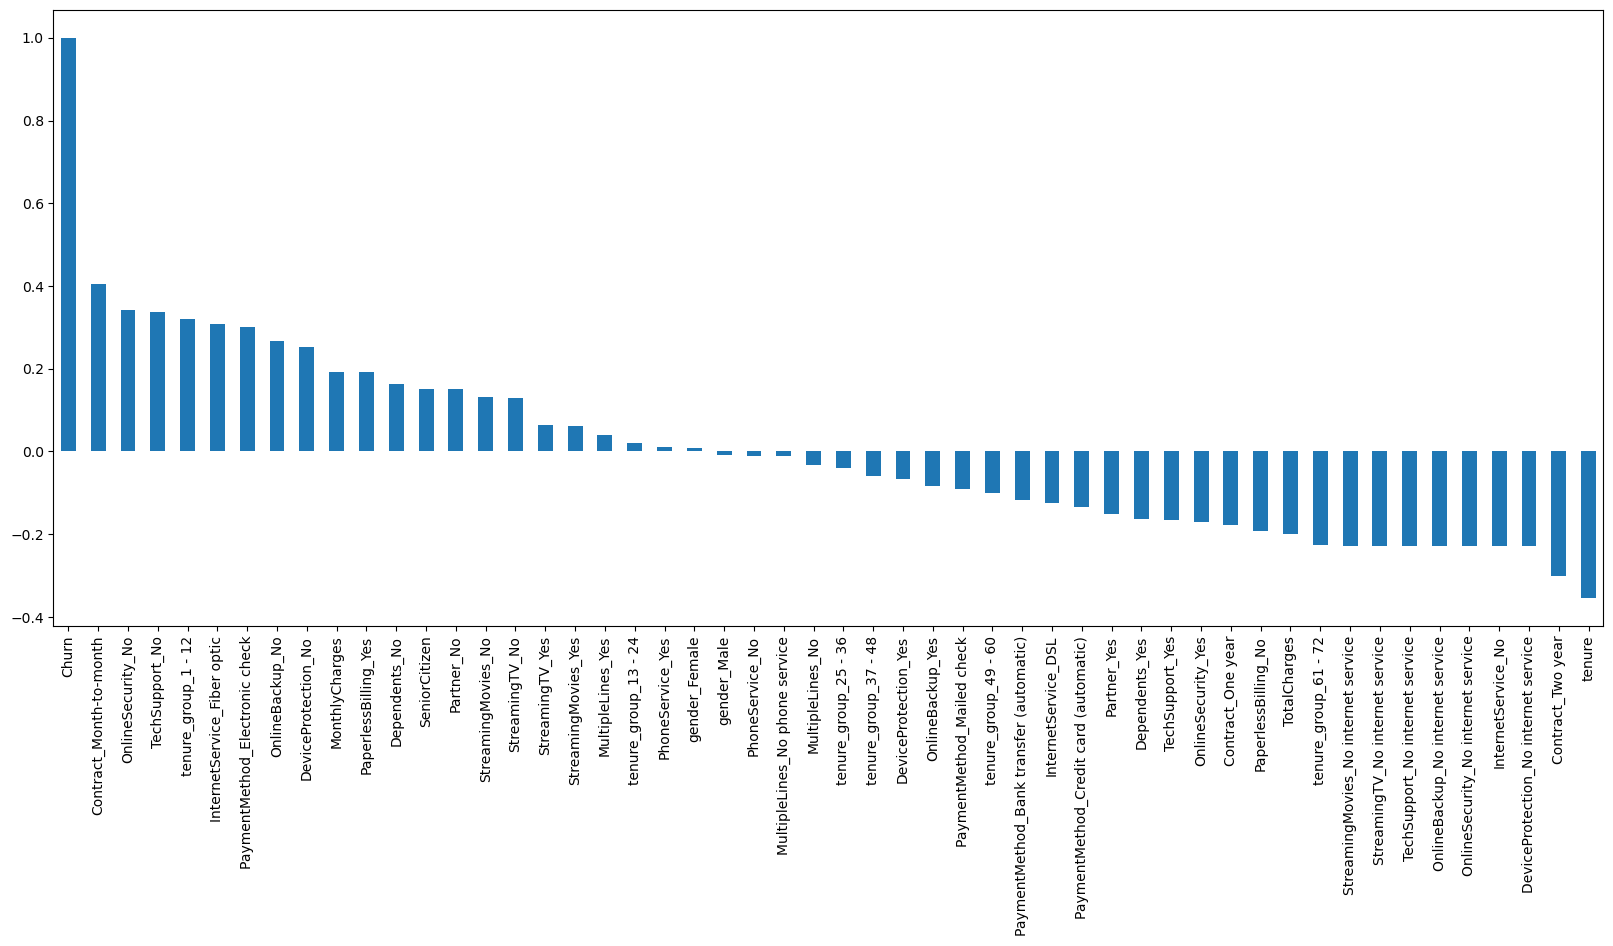

In [50]:
plt.figure(figsize=(20,8))
df1_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [51]:
##### Customers with  Contract_Month-to-month,OnlineSecurity-No,TechSupport_No,tenure_group 1-12,Fibre Optic internet service, electroniccheck payment method no online back up and device protection have the high chances for churning. gender and phone service have not much to do with churning.

<AxesSubplot:>

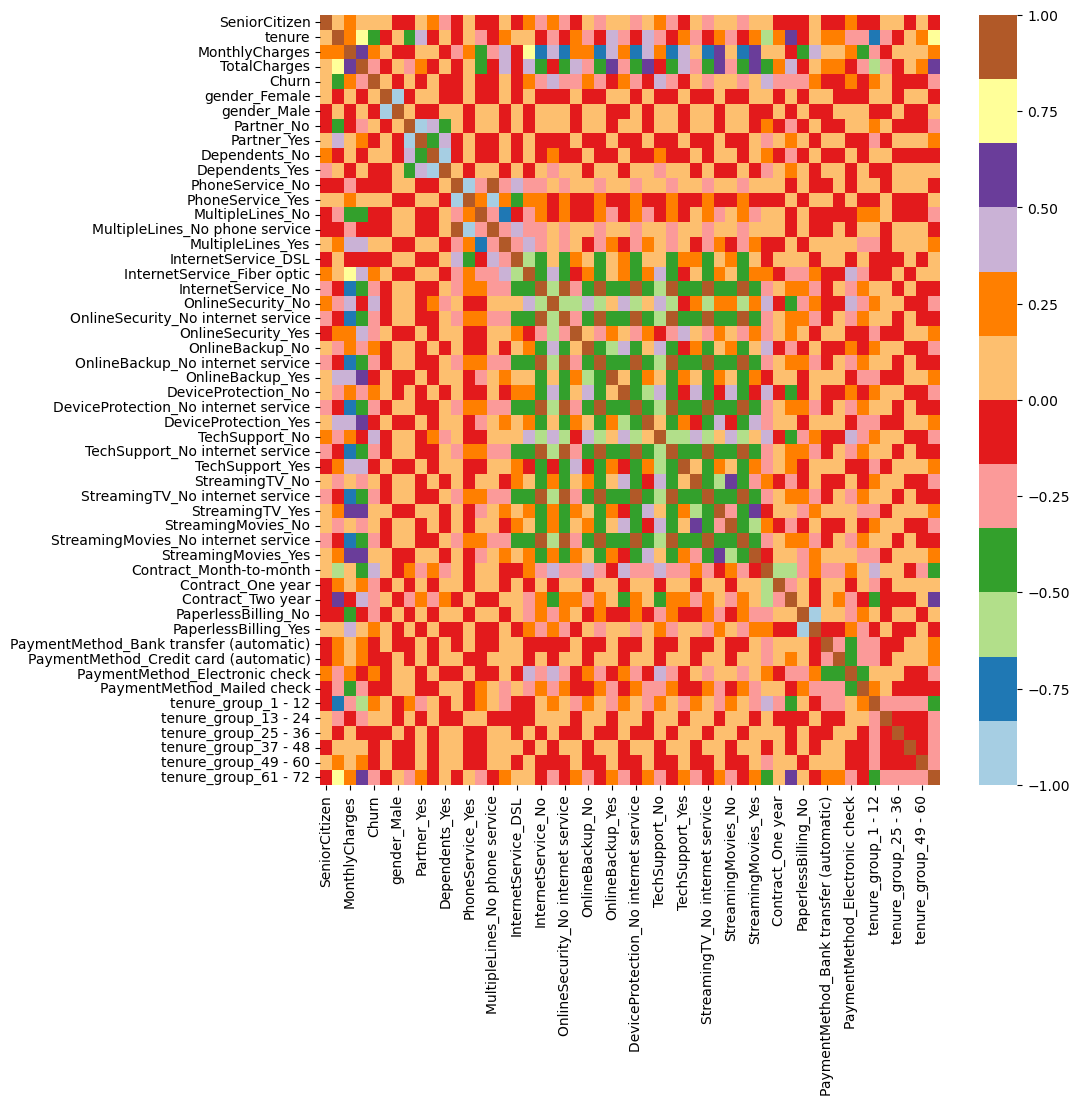

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(df1_dummies.corr(), cmap="Paired")

Text(0.5, 1.0, 'Monthly charges by churn')

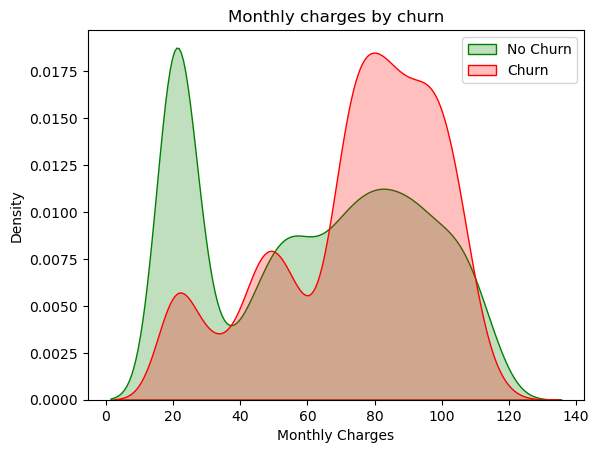

In [53]:
Mth = sns.kdeplot(df1_dummies.MonthlyCharges[(df1_dummies["Churn"] == 0) ],
                color="Green", shade = True)
Mth = sns.kdeplot(df1_dummies.MonthlyCharges[(df1_dummies["Churn"] == 1) ],
                ax =Mth, color="Red", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

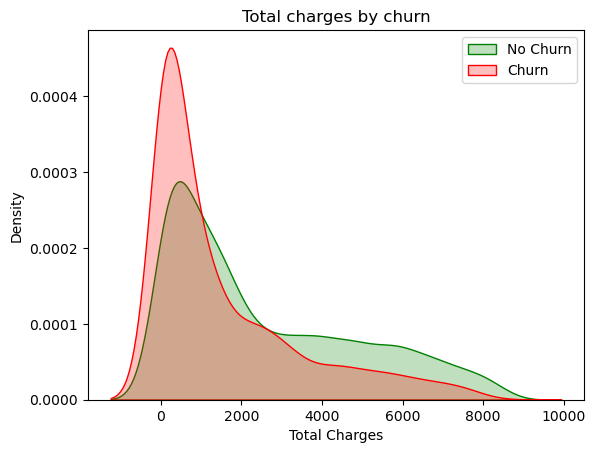

In [54]:
Tot = sns.kdeplot(df1_dummies.TotalCharges[(df1_dummies["Churn"] == 0) ],
                color="Green", shade = True)
Tot = sns.kdeplot(df1_dummies.TotalCharges[(df1_dummies["Churn"] == 1) ],
                ax =Tot, color="Red", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Text(0.5, 1.0, 'Tenure by churn')

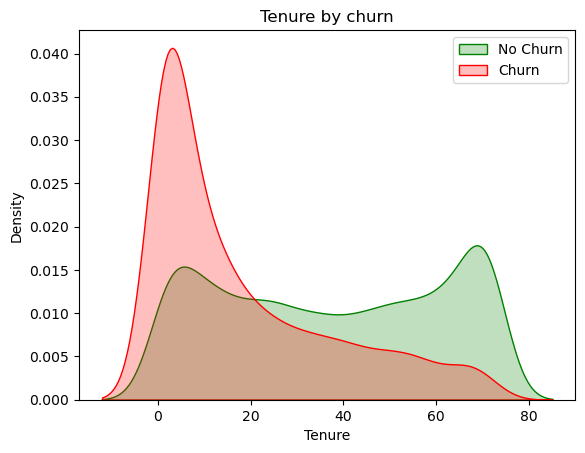

In [55]:
Ten = sns.kdeplot(df1_dummies.tenure[(df1_dummies["Churn"] == 0) ],
                color="Green", shade = True)
Ten = sns.kdeplot(df1_dummies.tenure[(df1_dummies["Churn"] == 1) ],
                ax =Ten, color="Red", shade= True)
Ten.legend(["No Churn","Churn"],loc='upper right')
Ten.set_ylabel('Density')
Ten.set_xlabel('Tenure')
Ten.set_title('Tenure by churn')

In [56]:
#### Distribution of Gender, Senior Citizen,  People who have Dependents & Partner among churned customers 

In [57]:
Churners = df[df['Churn']=='Yes']


In [58]:
selected_columns= ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

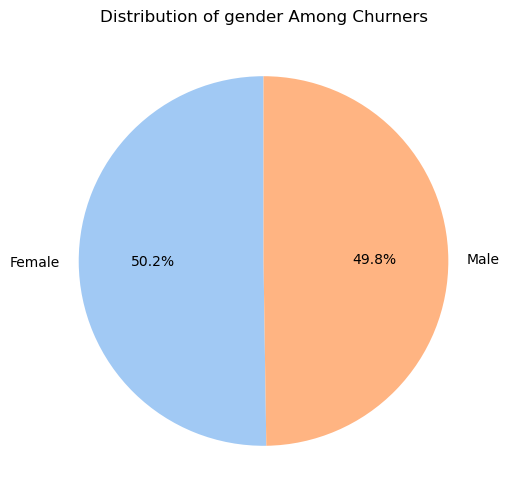

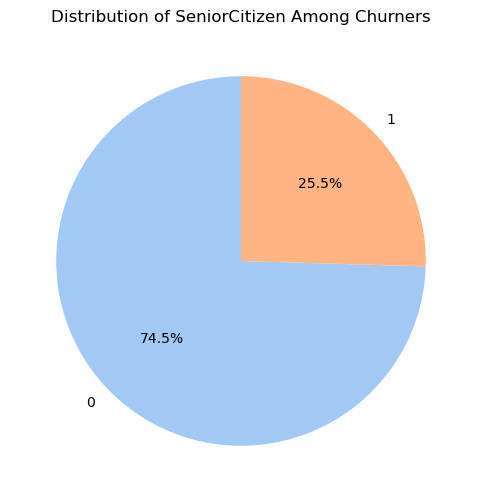

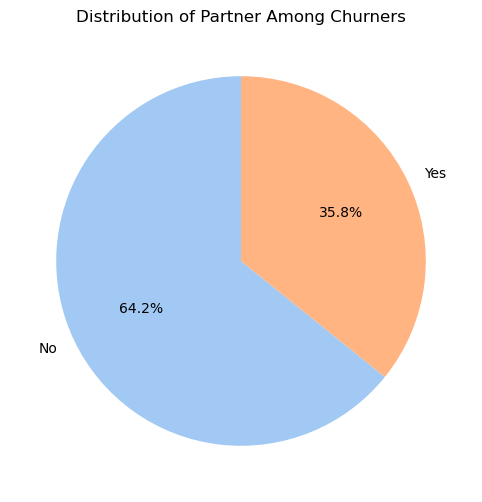

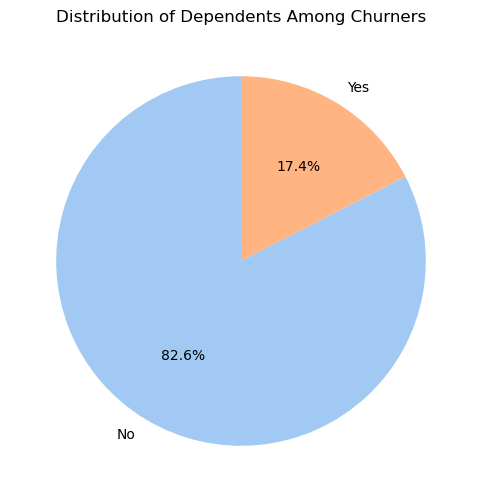

In [59]:
def plot_pie_chart(data, column, title):
    plt.figure(figsize=(8, 6))
    data[column].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
    plt.title(title)
    plt.ylabel('')  
    plt.show()


for column in selected_columns:
    plot_pie_chart(Churners, column, f'Distribution of {column} Among Churners')

In [60]:
#### Among Churners, most are non senior citizons. Most Churners do not have  a partner. About 83% churners do not have dependents.

In [61]:
# Model

In [62]:
#Since tenure is divided into groups as tenure_groups
df1_dummies.drop('tenure', axis=1, inplace=True)

In [63]:
df1_dummies

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [64]:
X = df1_dummies.drop('Churn', axis=1)
y = df1_dummies['Churn']

In [65]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Normalize numerical features after splitting
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [67]:
# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

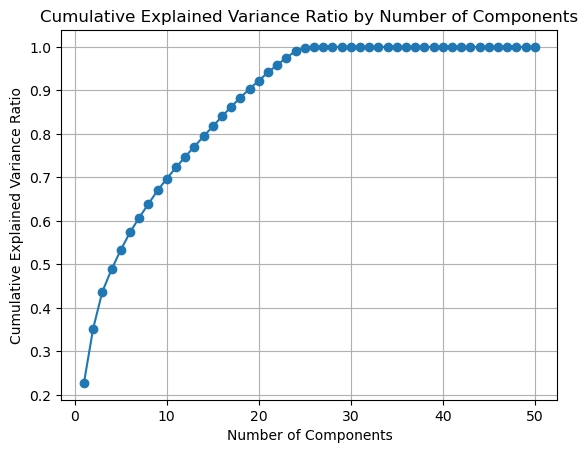

In [68]:
# Plot explained variance ratio
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

In [69]:
pca1 = PCA(0.95)
X_train_pca = pca1.fit_transform(X_train)
X_test_pca = pca1.transform(X_test)

In [70]:
X_train_pca.shape

(5625, 22)

In [71]:
X_train_pca

array([[-2.26358627, -0.9102466 ,  3.77612986, ..., -1.47415586,
         0.39292662,  0.54712424],
       [-0.84969948, -3.11171703,  0.6045162 , ...,  0.43801836,
         1.76828493,  1.68806472],
       [-2.57813418, -0.603429  , -1.65784221, ..., -0.92609386,
         0.28854558,  0.25307574],
       ...,
       [-2.19544117, -2.90319379, -1.26381586, ...,  0.38527996,
        -0.2761544 , -0.69300426],
       [ 6.22893741,  0.09956074, -0.41713224, ..., -0.09210078,
        -0.25934109, -0.292892  ],
       [-2.08441988, -2.20702916, -1.46869005, ...,  0.02343282,
         0.0417344 , -0.53851638]])

# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [73]:
predLR = logmodel.predict(X_test)

In [74]:
predLR

array([0, 0, 1, ..., 0, 0, 0])

In [75]:
print(classification_report(y_test, predLR))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.62      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



## creating a balanced and cleaned dataset by combining the oversampling of the minority class and the removal of noisy samples.

In [76]:
sm = SMOTEENN()

# Fit and resample the training data
X_resampled, y_resampled = sm.fit_resample(X, y)

# Splitting the resampled data into train and test sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=100)

# Create and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=100, max_iter=1000)
log_reg_model.fit(X_train_resampled, y_train_resampled)


C:\Users\hansa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=100)

In [77]:
y_pred2 = log_reg_model.predict(X_test_resampled)

# Evaluate the model
print("Classification Report on Original Test Set:")
print(classification_report(y_test_resampled, y_pred2))

Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       534
           1       0.94      0.95      0.95       638

    accuracy                           0.94      1172
   macro avg       0.94      0.94      0.94      1172
weighted avg       0.94      0.94      0.94      1172



In [78]:
X_resampled.shape

(5859, 50)

In [79]:
X.shape

(7032, 50)

# ANN

## 1.Seeing whether pca analysis will improve the performance of the ANN model

In [80]:
ann_model1 = Sequential()
ann_model1.add(Input(shape=(X_train_pca.shape[1],)))
ann_model1.add(Dense(64, activation='relu'))
ann_model1.add(Dense(32, activation='relu'))
ann_model1.add(Dense(1, activation='sigmoid'))

In [81]:
ann_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping1 = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# Training the ANN with early stopping
history = ann_model1.fit(X_train_pca, y_train, batch_size=10, epochs=100, validation_split=0.2, callbacks=[early_stopping1])



Epoch 1/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7479 - loss: 0.4969 - val_accuracy: 0.7973 - val_loss: 0.4181
Epoch 2/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7963 - loss: 0.4278 - val_accuracy: 0.7947 - val_loss: 0.4088
Epoch 3/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8096 - loss: 0.4116 - val_accuracy: 0.8044 - val_loss: 0.4072
Epoch 4/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8091 - loss: 0.4054 - val_accuracy: 0.8027 - val_loss: 0.4137
Epoch 5/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8215 - loss: 0.3869 - val_accuracy: 0.7947 - val_loss: 0.4153
Epoch 6/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8257 - loss: 0.3860 - val_accuracy: 0.7938 - val_loss: 0.4205
Epoch 7/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8360 - loss: 0.3701 - val_accuracy: 0.7920 - val_loss: 0.4204
Epoch 8/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8347 - loss: 0.3722 - val_accu

In [82]:
# Evaluating the model
loss, accuracy = ann_model1.evaluate(X_test_pca, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7762 - loss: 0.4500 
Test Loss: 0.4490533471107483
Test Accuracy: 0.7796730399131775


In [83]:
# Predicting the test data
y_pred_prob = ann_model1.predict(X_test_pca)

# Converting probabilities to binary predictions
y_pred_ann = (y_pred_prob > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_ann))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.51      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



## 2. Applying ANN before oversampling the minority class

In [84]:
ann_model2 = Sequential()
ann_model2.add(Input(shape=(X_train.shape[1],)))
ann_model2.add(Dense(64, activation='relu'))
ann_model2.add(Dense(32, activation='relu'))
ann_model2.add(Dense(1, activation='sigmoid'))

In [85]:
ann_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


early_stopping2 = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the ANN model with early stopping
history = ann_model2.fit(X_train, y_train, batch_size=10, epochs=100, validation_split=0.2, callbacks=[early_stopping2])


Epoch 1/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7416 - loss: 0.4949 - val_accuracy: 0.7929 - val_loss: 0.4082
Epoch 2/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8052 - loss: 0.4117 - val_accuracy: 0.7991 - val_loss: 0.4094
Epoch 3/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8031 - loss: 0.4025 - val_accuracy: 0.7964 - val_loss: 0.4099
Epoch 4/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8164 - loss: 0.3960 - val_accuracy: 0.8000 - val_loss: 0.4130
Epoch 5/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8205 - loss: 0.3862 - val_accuracy: 0.7964 - val_loss: 0.4221
Epoch 6/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8261 - loss: 0.3759 - val_accuracy: 0.8000 - val_loss: 0.4160
Epoch 7/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8304 - loss: 0.3632 - val_accuracy: 0.8053 - val_loss: 0.4137
Epoch 8/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8476 - loss: 0.3473 - val_accu

In [86]:

loss, accuracy = ann_model2.evaluate(X_test, y_test)
print("Test Loss on  Data:", loss)
print("Test Accuracy on Data:", accuracy)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7787 - loss: 0.4368 
Test Loss on  Data: 0.44110870361328125
Test Accuracy on Data: 0.7839374542236328


In [87]:
y_pred1_ann = ann_model2.predict(X_test).round()

# Evaluate the model
print("Classification Report on  Test Set:")
print(classification_report(y_test, y_pred1_ann))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report on  Test Set:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1033
           1       0.65      0.41      0.50       374

    accuracy                           0.78      1407
   macro avg       0.73      0.67      0.68      1407
weighted avg       0.77      0.78      0.77      1407



## 3. Applying ANN to the balanced dataset that got from oversampling of the minority class and the removal of noisy samples.¶

In [88]:
ann_model = Sequential()
ann_model.add(Input(shape=(X_train_resampled.shape[1],)))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

In [89]:
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the ANN model with early stopping
history = ann_model.fit(X_train_resampled, y_train_resampled, batch_size=10, epochs=100, validation_split=0.2, callbacks=[early_stopping])



Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7607 - loss: 3.9003 - val_accuracy: 0.5682 - val_loss: 11.2460
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8211 - loss: 3.0583 - val_accuracy: 0.9094 - val_loss: 0.3967
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8434 - loss: 2.3784 - val_accuracy: 0.9136 - val_loss: 0.3728
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8683 - loss: 1.4305 - val_accuracy: 0.9147 - val_loss: 0.5057
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8788 - loss: 1.6351 - val_accuracy: 0.8859 - val_loss: 0.6166
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8945 - loss: 1.0415 - val_accuracy: 0.9318 - val_loss: 0.3051
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8844 - loss: 1.1089 - val_accuracy: 0.8881 - val_loss: 0.5926
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8886 - loss: 1.2065 - val_acc

In [90]:
# Evaluate the ANN model on the resampled test set
loss, accuracy = ann_model.evaluate(X_test_resampled, y_test_resampled)
print("Test Loss on Resampled Data:", loss)
print("Test Accuracy on Resampled Data:", accuracy)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9412 - loss: 0.2149 
Test Loss on Resampled Data: 0.22667185962200165
Test Accuracy on Resampled Data: 0.9428327679634094


In [91]:
y_pred_resampled_ann = ann_model.predict(X_test_resampled).round()

# Evaluate the model
print("Classification Report on Resampled Test Set:")
print(classification_report(y_test_resampled, y_pred_resampled_ann))

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report on Resampled Test Set:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       534
           1       0.95      0.95      0.95       638

    accuracy                           0.94      1172
   macro avg       0.94      0.94      0.94      1172
weighted avg       0.94      0.94      0.94      1172



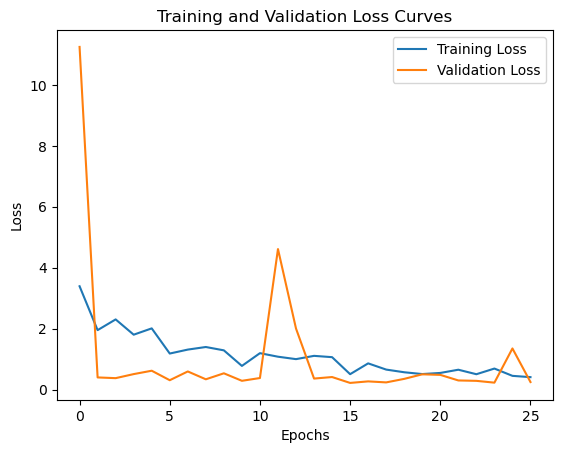

In [92]:
# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

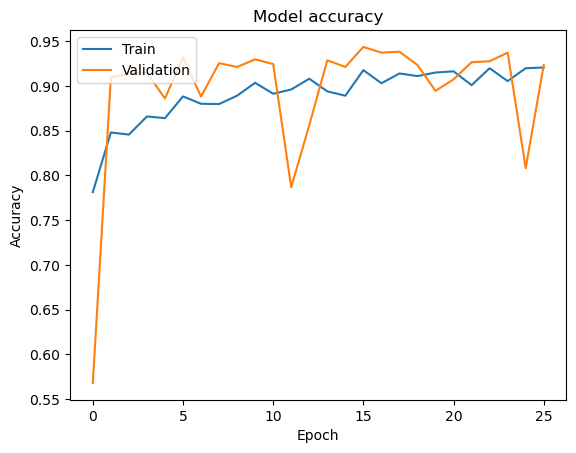

In [93]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Desicion Tree Classifier

In [94]:
model_dt_original = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
model_dt_original.fit(X_train, y_train)

# Evaluate the Decision Tree Classifier on the original data
y_pred_original = model_dt_original.predict(X_test)
print("Original Data - Classification Report:")
print(classification_report(y_test, y_pred_original))

Original Data - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.59      0.57       374

    accuracy                           0.77      1407
   macro avg       0.70      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



In [95]:
# Train the Decision Tree Classifier on the resampled data
model_dt_resampled = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
model_dt_resampled.fit(X_train_resampled, y_train_resampled)


y_pred_resampled = model_dt_resampled.predict(X_test_resampled)
print("Resampled Data - Classification Report:")
print(classification_report(y_test_resampled, y_pred_resampled))


Resampled Data - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       534
           1       0.94      0.95      0.95       638

    accuracy                           0.94      1172
   macro avg       0.94      0.94      0.94      1172
weighted avg       0.94      0.94      0.94      1172



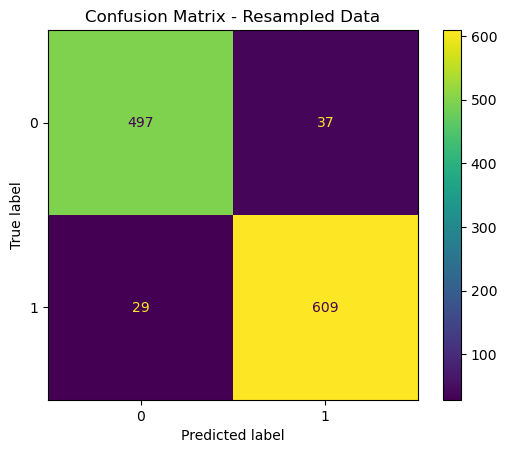

In [96]:
conf_matrix_resampled = confusion_matrix(y_test_resampled, y_pred_resampled)
disp_resampled = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_resampled)
disp_resampled.plot()
plt.title("Confusion Matrix - Resampled Data")
plt.show()

# Random Forest Classifier

In [97]:
rf_original = RandomForestClassifier(random_state=100)
rf_original.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [98]:
y_pred_original_rf = rf_original.predict(X_test)
print("Original Data - Classification Report:")
print(classification_report(y_test, y_pred_original_rf))

Original Data - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1033
           1       0.58      0.43      0.49       374

    accuracy                           0.77      1407
   macro avg       0.70      0.66      0.67      1407
weighted avg       0.75      0.77      0.75      1407



In [99]:
# Train the Random Forest Classifier on the resampled data
rf_resampled = RandomForestClassifier(random_state=100)
rf_resampled.fit(X_train_resampled, y_train_resampled)


y_pred_resampled_rf = rf_resampled.predict(X_test_resampled)
print("Resampled Data - Classification Report:")
print(classification_report(y_test_resampled, y_pred_resampled_rf))

Resampled Data - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       534
           1       0.96      0.97      0.97       638

    accuracy                           0.96      1172
   macro avg       0.96      0.96      0.96      1172
weighted avg       0.96      0.96      0.96      1172



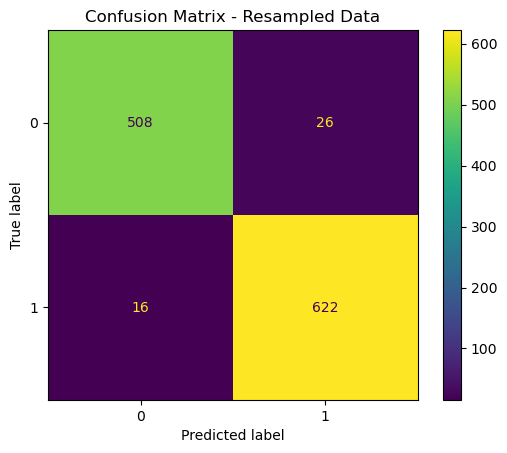

In [100]:
conf_matrix_resampled = confusion_matrix(y_test_resampled, y_pred_resampled_rf)
disp_resampled = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_resampled)
disp_resampled.plot()
plt.title("Confusion Matrix - Resampled Data")
plt.show()

In [101]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=100)

rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                      n_iter=100, cv=3, verbose=2, random_state=100, n_jobs=-1)

# Fit RandomizedSearchCV on the resampled training data
rf_random_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters found by RandomizedSearchCV
print("Best parameters found: ", rf_random_search.best_params_)

# Train the best model on the resampled training data
best_rf = rf_random_search.best_estimator_
best_rf.fit(X_train_resampled, y_train_resampled)

# Evaluate the best model on the resampled test data
y_pred_rf = best_rf.predict(X_test_resampled)
print("Resampled Data - Classification Report (After Hyperparameter Tuning):")
print(classification_report(y_test_resampled, y_pred_rf))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\hansa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
108 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hansa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hansa\anaconda3\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hansa\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hansa\anaconda3\lib\site-package

Best parameters found:  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
Resampled Data - Classification Report (After Hyperparameter Tuning):
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       534
           1       0.96      0.97      0.97       638

    accuracy                           0.97      1172
   macro avg       0.97      0.96      0.96      1172
weighted avg       0.97      0.97      0.96      1172



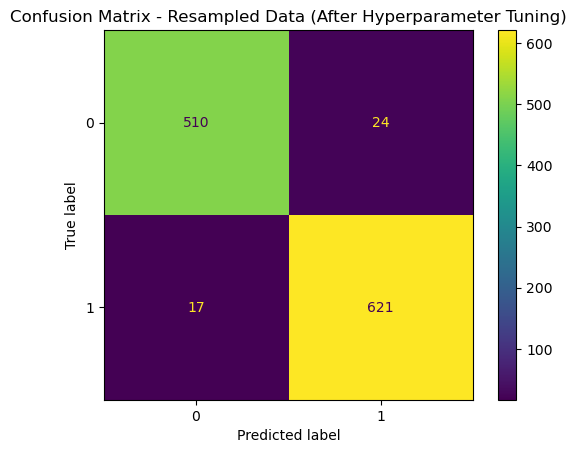

In [102]:
conf_matrix_resampled = confusion_matrix(y_test_resampled, y_pred_rf)
disp_resampled = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_resampled)
disp_resampled.plot()
plt.title("Confusion Matrix - Resampled Data (After Hyperparameter Tuning)")
plt.show()

### Hyperparameter tuning didn't improve the model so  our best model is the Random Forest Classifier that is applied on the resampled data

## Saving the model

In [103]:
import pickle
filename = 'best_model.sav'
pickle.dump(best_rf, open(filename, 'wb'))

# Load the model
load_model = pickle.load(open(filename, 'rb'))

# Evaluate the model
best_model_score = load_model.score(X_test_resampled, y_test_resampled)
print(best_model_score)

0.9650170648464164


In [104]:
with open("feature_names.pkl", "wb") as feature_file:
    pickle.dump(X_resampled.columns.tolist(), feature_file)